### 1. Auftrag auslenkungen messen

In [32]:
import import_ipynb
import os
import numpy as np

#### Niklas
M_1 = 200+(400+50+10+2)# g
l_1 = 54 # cm
# Messunsicherheit bottom/top: 0.005mm
Translation_Of_Scale_Meas_1_Bound_Top, Translation_Of_Scale_Meas_1_Bound_Bottom = np.genfromtxt(os.path.join(os.getcwd(), "translation_of_scale_meas_1.csv"), delimiter=',', skip_header=1, unpack=True)
Translation_Of_Scale_Meas_1 = np.abs(Translation_Of_Scale_Meas_1_Bound_Top - Translation_Of_Scale_Meas_1_Bound_Bottom)
A_meas_1 = Translation_Of_Scale_Meas_1/2
print("Person 1 (Niklas) A measurements: ", A_meas_1)
print("Person 1 (Niklas) A mean: ", np.mean(A_meas_1))
print("Person 1 (Niklas) A standard deviation: ", np.std(A_meas_1))



Person 1 (Niklas) A measurements:  [1.32  1.32  1.305 1.375 1.315 1.325 1.31  1.32  1.31  1.325]
Person 1 (Niklas) A mean:  1.3225000000000002
Person 1 (Niklas) A standard deviation:  0.018607794065928367


In [33]:
#### Dominik
M_2 = 200+(400+50+10+2)# g
l_2 = 54 # cm
# Messunsicherheit bottom/top: 0.005mm
Translation_Of_Scale_Meas_2_Bound_Top, Translation_Of_Scale_Meas_2_Bound_Bottom = np.genfromtxt(os.path.join(os.getcwd(), "translation_of_scale_meas_2.csv"), delimiter=',', skip_header=1, unpack=True)
Translation_Of_Scale_Meas_2 = np.abs(Translation_Of_Scale_Meas_2_Bound_Top - Translation_Of_Scale_Meas_2_Bound_Bottom)
A_meas_2 = Translation_Of_Scale_Meas_2/2
print("Person 2 (Dominik) A measurements: ", A_meas_2)
print("Person 2 (Dominik) A mean: ", np.mean(A_meas_2))
print("Person 2 (Dominik) A standard deviation: ", np.std(A_meas_2))

Person 2 (Dominik) A measurements:  [1.34   1.335  1.3475 1.325  1.35   1.3325 1.3525 1.355  1.3625 1.335 ]
Person 2 (Dominik) A mean:  1.3435
Person 2 (Dominik) A standard deviation:  0.011191514642799608


### 4. + 5.

[0.00014  0.000145 0.000165 0.00017  0.000195 0.000205 0.000245 0.00026
 0.00028  0.00034  0.000385 0.00047  0.000565 0.000705 0.000895 0.00111
 0.001315 0.00148  0.001535 0.00081  0.00053  0.00042  0.00035  0.000305
 0.00026  0.00024  0.000215 0.000185 0.000165 0.00014  0.00015 ]
[2.60126671 2.60503393 2.60879572 2.61255209 2.61630306 2.62004866
 2.62378892 2.62752385 2.63125348 2.63497784 2.63869693 2.64241079
 2.64611944 2.6498229  2.65352119 2.65721433 2.66090235 2.66458526
 2.66826309 2.67193585 2.67560358 2.67926628 2.68292398 2.68657671
 2.69022447 2.69386729 2.6975052  2.7011382  2.70476633 2.7083896
 2.71200802]
[0.00188498 0.00188225 0.00187954 0.00187683 0.00187414 0.00187146
 0.0018688  0.00186614 0.00186349 0.00186086 0.00185824 0.00185563
 0.00185302 0.00185044 0.00184786 0.00184529 0.00184273 0.00184018
 0.00183765 0.00183512 0.00183261 0.0018301  0.00182761 0.00182512
 0.00182265 0.00182018 0.00181773 0.00181528 0.00181285 0.00181042
 0.00180801]
[[Model]]
    Model(gau

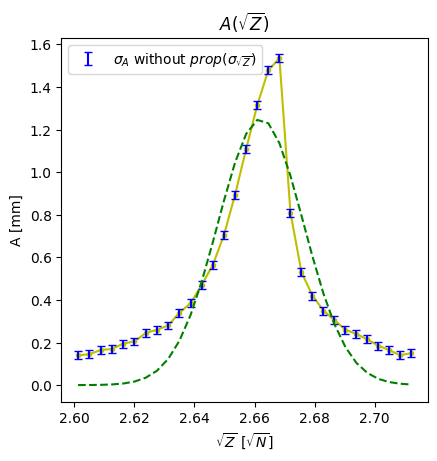

In [56]:
import os
import numpy as np
l_4 = 40 # cm

weight_4_without_the_200g, translation_4_bottom, translation_4_top = np.genfromtxt(os.path.join(os.getcwd(), "4_weights_amplitude.csv"), delimiter=',', skip_header=1, unpack=True)
translation_4_meas = np.abs(translation_4_top - translation_4_bottom)
A_4_meas_mm = translation_4_meas/2
weight_m_4_meas_grams = weight_4_without_the_200g + 200 # in grams

# Taylor, Barry N.; Thompson, Ambler, eds. (March 2008). The international system of units (SI) (PDF) (Report). National Institute of Standards and Technology. p. 52. NIST special publication 330, 2008 edition.
g = 9.80665 # m/s2
sig_g = 0.000005 # m/s2
sig_m_kg = 0.0005 # kg
def calc_Z_sqrt_of_m_grams(m_gr):
    # TODO verify error propagation of this
    return calc_Z_sqrt_of_m_kg(m_gr / 1000)

def calc_Z_of_m_grams(m_gr):
    return calc_Z_of_m_kg(m_gr / 1000)

# Calculate sqrt(Force Z Newton) from appended mass in kg.
def calc_Z_sqrt_of_m_kg(m_kg,):
    return np.sqrt(2*(g*m_kg)), np.sqrt(g/(2*m_kg)*sig_m_kg**2 + m_kg/(2*g)*sig_g**2)

def calc_Z_of_m_kg(m_kg):
    return 2*g*m_kg, np.sqrt(np.square(sig_m_kg)*np.square(2*g) + np.square(sig_g)*np.square(2*m_kg))

# A
A_values_4_m = A_4_meas_mm / 1000
A_values_4_mm = A_4_meas_mm
# sqrt Z
Z_4_values_newton_sqrt, Z_4_values_newton_error_sqrt = calc_Z_sqrt_of_m_grams(weight_m_4_meas_grams)# TODO TODO error of m grams

# TODO Add error for m of 1g
sig_A_values_4_m = np.ones(len(A_values_4_m))*np.std(A_meas_1/1000)
sig_A_values_4_mm = np.ones(len(A_4_meas_mm))*np.std(A_meas_1)

print(A_values_4_m)
print(Z_4_values_newton_sqrt)
print(Z_4_values_newton_error_sqrt)
# Helper function
import matplotlib.pyplot as plt
def errorbar_plot_A_sqrtZ(A_values, Sqrt_Z_values,sig):
    x, y = Sqrt_Z_values, A_values
    cm = 1/2.54

    fig, ax = plt.subplots(1,1,figsize=(12*cm, 12*cm))
    ax.plot(x,y, 'yo-', ms=3)
    ax.errorbar(x, y, yerr=sig, linestyle='', color='blue', capsize=3, label=r'$\sigma_{A}$ without $prop(\sigma_{\sqrt{Z}})$')
    lmfit_fitting_gaussian(Sqrt_Z_values, A_values, sig,ax)
    ax.set_xlabel(r'$\sqrt{Z}$ [$\sqrt{N}$]')
    ax.set_ylabel('A [mm]')
    ax.set_title(r'$A(\sqrt{Z})$')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-4,4])
    ax.legend(loc='upper left')
    plt.show()

import numpy as np
from lmfit import Model
from lmfit.models import GaussianModel, ConstantModel
import matplotlib.pyplot as plt

def lmfit_fitting_gaussian(x, y, sig, ax):
    def gaussian_model(x, a):
        x0, std = a[0], a[1]
        return np.exp(-1/2 * ((x-x0)/std)**2)
    w = 1/sig**2 # Or: 1/sig**2
    model = GaussianModel()
    pars = model.guess(y, x=x, amplitude=1.6)
    result = model.fit(y, pars, x=x, weights=w)
    print(result.fit_report())
    #ax.plot(x, y, 'go', ms=3)
    #ax.errorbar(x, y, sig)
    ax.plot(x, result.best_fit, 'g--')

errorbar_plot_A_sqrtZ(A_values_4_mm, Z_4_values_newton_sqrt, sig_A_values_4_mm)

# Mean of the resonance curve:
# SEE lmfit reports
# FWHM:
# SEE lmfit reports

# Fit to gaussian
## using def lmfit_fitting_gaussian(x, y, sig):


### 6. One expects that for 1/3 of the data points the
fit curve does not pass through the error bar. Is
this the case for you? If not, explain why this
is not the case.

Most points do not pass through the error bar. In our opinion, this could indicate that the gaussian curve is not an ideal model to fit this data.
It is also relevant that the painted error bars do not include the propagation (by the gaussian function) of the errors of Z.

### 7.
Check the law (7) for its validity. For various
string lengths l, determine the tensile force Z
for which the string resonates. Graph Z as a
function of l2. Change the length l in steps of
2 cm between 36 and 54 cm.

Sig Z: [0.00980665 0.00980665 0.00980665 0.00980665 0.00980665 0.00980665
 0.00980665 0.00980665 0.00980665 0.00980665]
Sig l^2 prop: [0.03290151 0.03472938 0.03655724 0.0383851  0.04021296 0.04204082
 0.04386869 0.04569655 0.04752441 0.04935227]


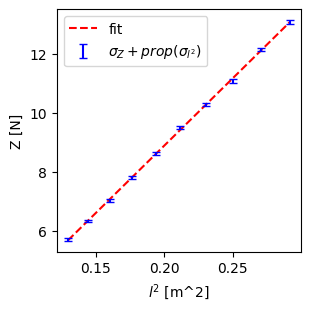

In [87]:
length_7_cm, resonance_mass_7_grams_without200gr = np.genfromtxt(os.path.join(os.getcwd(), "7_lengths_resonanceMass.csv"), delimiter=',', skip_header=1, unpack=True)
mass_7_grams = resonance_mass_7_grams_without200gr + 200

length_7_m = length_7_cm / 100
mass_7_kg = mass_7_grams / 1000
Z_7_kg, Z_7_kg_sig = calc_Z_of_m_grams(mass_7_grams)

length_7_squared_m = np.square(length_7_m)

sig_l_cm = 0.1 # cm
sig_l_m = sig_l_cm / 100
sig_l_squared_m = np.sqrt(np.square(sig_l_m)*np.square(2*length_7_m))
# Helper function
import matplotlib.pyplot as plt
from scipy.stats import linregress
def errorbar_plot_Z_of_l_squared(l_squared, Z, sig_Z):
    slope, intercept, rvalue, pvalue, sevalue = scipy.stats.linregress(l_squared, Z)
    x_axis_spaced = np.linspace(np.min(l_squared), np.max(l_squared), 10)
    sigprop = np.sqrt(np.square(sig_l_squared_m)*np.square(slope))
    print("Sig Z:", sig_Z)
    print("Sig l^2 prop:", sigprop)
    x, y = l_squared, Z
    sig = sig_Z + sigprop
    cm = 1/2.54
    fig, ax = plt.subplots(1,1,figsize=(8*cm, 8*cm))
    #ax.plot(x,y,linestyle='-', color='red')
    ax.plot(x_axis_spaced, slope*x_axis_spaced + intercept, 'r--', label='fit')
    ax.errorbar(x, y, yerr=sig, linestyle='', color='blue', capsize=3, label=r'$\sigma_{Z} + prop(\sigma_{l^2})$')
    ax.set_xlabel(r'$l^2$ [m^2]')
    ax.set_ylabel('Z [N]')
    #ax.set_xlim([-1,1])
    #ax.set_ylim([-4,4])
    ax.legend(loc='upper left')
    plt.show()

errorbar_plot_Z_of_l_squared(length_7_squared_m, Z_7_kg, Z_7_kg_sig)

### 8.

In [94]:
mu = 7.06e-3 * 100 / 1000 # kg / m
print("mass per unit length mu: ", mu)

def calc_nu1(l, Z):
    nu1 = 1/(2*l)*np.sqrt(Z/mu)
    print("For l=", l, " and Z = ", Z)
    print("the calculated nu1 frequencies are: ", nu1)
    return nu1

calc_nu1(length_7_m, Z_7_kg)



mass per unit length mu:  0.000706
For l= [0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54]  and Z =  [ 5.7074703  6.3350959  7.0215614  7.8257067  8.629852   9.4928372
 10.2969825 11.0815145 12.160246  13.0820711]
the calculated nu1 frequencies are:  [124.8783015  124.6409223  124.6592505  125.33724572 125.63673778
 126.03983866 125.80022091 125.28446103 126.19306554 126.04108892]


array([124.8783015 , 124.6409223 , 124.6592505 , 125.33724572,
       125.63673778, 126.03983866, 125.80022091, 125.28446103,
       126.19306554, 126.04108892])

As the length gets larger, the fundamental frequency gets closer to the driving frequency.
This might be due to less vertical damping forces.